## Based on https://www.tensorflow.org/tutorials/load_data/csv

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("OSA_complete_patients.csv", index_col = 0)

In [3]:
data.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,5.0,3
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,1.0,0.0,0.0,1.0,19.0,17.0,4.0,3
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,0.0,1
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,13.0,2.0,3


### One hot encoding the class labels 

In [4]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing severoty column (label encoded values of severities)
enc_df = pd.DataFrame(enc.fit_transform(data[['Severity']]).toarray(), index = data.index)


# merge with main df bridge_df on key values
data2 = pd.concat([data, enc_df], axis = 1)
data2

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Near_miss_accident,Respiratory_arrest,Epworth_scale,Pichots_scale,Depression_scale,Severity,0,1,2,3
39,23,2.0,57.883641,0.0,0.0,0.0,172.0,90.0,45.0,125.0,...,0.0,0.0,3.0,4.0,5.0,3,0.0,0.0,0.0,1.0
41,24,2.0,60.796715,0.0,0.0,0.0,156.0,85.0,35.0,113.0,...,0.0,1.0,19.0,17.0,4.0,3,0.0,0.0,0.0,1.0
46,28,1.0,63.438741,0.0,0.0,0.0,178.0,68.0,35.0,73.0,...,0.0,1.0,5.0,3.0,0.0,1,0.0,1.0,0.0,0.0
55,32,1.0,28.736482,0.0,0.0,0.0,180.0,69.0,36.0,83.0,...,0.0,0.0,2.0,0.0,0.0,0,1.0,0.0,0.0,0.0
56,33,1.0,56.802190,0.0,0.0,0.0,185.0,118.0,43.0,106.0,...,0.0,1.0,12.0,13.0,2.0,3,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190460,111385,2.0,53.596167,0.0,0.0,1.0,164.0,88.0,37.0,92.0,...,0.0,0.0,2.0,14.0,4.0,1,0.0,1.0,0.0,0.0
190467,111392,1.0,72.539357,0.0,1.0,1.0,167.0,67.0,39.0,89.0,...,0.0,1.0,4.0,1.0,0.0,3,0.0,0.0,0.0,1.0
190469,111394,2.0,46.986995,0.0,1.0,1.0,158.0,56.0,35.0,89.0,...,1.0,0.0,15.0,24.0,6.0,1,0.0,1.0,0.0,0.0
190502,111424,2.0,75.698836,0.0,1.0,0.0,150.0,68.0,36.0,96.0,...,0.0,0.0,5.0,16.0,8.0,3,0.0,0.0,0.0,1.0


In [5]:
enc_df.shape

(21818, 4)

In [6]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']

continuous = ['Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP',
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']

In [7]:
X=data[features]  # Features  
y=data['Severity']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [8]:
scaler = MinMaxScaler()  
    # Scale only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
    # apply same transformation to test data
X_test = scaler.transform(X_test) 

In [9]:
print(X_train.shape, X_test.shape)

(17454, 49) (4364, 49)


### LSTM

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128, activation = 'relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = 'relu')) 
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation = 'softmax')) 


In [11]:
X_train.shape

(17454, 49)

In [12]:
X_train_lstm = X_train.reshape(X_train.shape[0],1,49) # LSTM requires a 3D array in the format: (# samples, timesteps, # features)

X_test_lstm = X_test.reshape(X_test.shape[0], 1, 49)

In [13]:
X_train_lstm.shape

(17454, 1, 49)

In [14]:
opt = tf.keras.optimizers.Adam(lr = 1e-5, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_lstm, y_train, epochs = 10)


Epoch 1/10


C:\Users\amona\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


546/546 [==============================] - 8s 6ms/step - loss: 1.3799 - accuracy: 0.3982
Epoch 2/10
546/546 [==============================] - 3s 6ms/step - loss: 1.3636 - accuracy: 0.4023
Epoch 3/10
546/546 [==============================] - 3s 6ms/step - loss: 1.3365 - accuracy: 0.4023
Epoch 4/10
546/546 [==============================] - 3s 6ms/step - loss: 1.3093 - accuracy: 0.4023
Epoch 5/10
546/546 [==============================] - 4s 7ms/step - loss: 1.2967 - accuracy: 0.4023
Epoch 6/10
546/546 [==============================] - 4s 6ms/step - loss: 1.2894 - accuracy: 0.4023
Epoch 7/10
546/546 [==============================] - 3s 6ms/step - loss: 1.2841 - accuracy: 0.4023
Epoch 8/10
546/546 [==============================] - 4s 7ms/step - loss: 1.2782 - accuracy: 0.4023
Epoch 9/10
546/546 [==============================] - 3s 6ms/step - loss: 1.2724 - accuracy: 0.4023
Epoch 10/10
546/546 [==============================] - 3s 6ms/step - loss: 1.2680 - accuracy: 0.4023


In [15]:
val_loss, val_acc = model.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 1s 3ms/step - loss: 1.2647 - accuracy: 0.4024


### SimpleRNN

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(12, activation = 'tanh'))
model.add(tf.keras.layers.Dense(12, activation = 'relu')) 
model.add(tf.keras.layers.Dense(4, activation = 'softmax')) 


opt = tf.keras.optimizers.Adam(lr = 1e-5, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_lstm, y_train, epochs = 10)

Epoch 1/10
546/546 [==============================] - 3s 3ms/step - loss: 1.3748 - accuracy: 0.3446
Epoch 2/10
546/546 [==============================] - 1s 2ms/step - loss: 1.3637 - accuracy: 0.3648
Epoch 3/10
546/546 [==============================] - 1s 2ms/step - loss: 1.3543 - accuracy: 0.3792
Epoch 4/10
546/546 [==============================] - 1s 3ms/step - loss: 1.3463 - accuracy: 0.3854
Epoch 5/10
546/546 [==============================] - 1s 2ms/step - loss: 1.3395 - accuracy: 0.3899
Epoch 6/10
546/546 [==============================] - 1s 2ms/step - loss: 1.3336 - accuracy: 0.3934
Epoch 7/10
546/546 [==============================] - 1s 2ms/step - loss: 1.3285 - accuracy: 0.3956
Epoch 8/10
546/546 [==============================] - 1s 2ms/step - loss: 1.3241 - accuracy: 0.3977
Epoch 9/10
546/546 [==============================] - 1s 2ms/step - loss: 1.3202 - accuracy: 0.3988
Epoch 10/10
546/546 [==============================] - 1s 2ms/step - loss: 1.3168 - accuracy: 0.4000

In [17]:
val_loss, val_acc = model.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.3162 - accuracy: 0.4001


## Hyperparameter optimization simple RNN
from https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53

https://nbviewer.org/github/autonomio/talos/blob/master/examples/Hyperparameter%20Optimization%20with%20Keras%20for%20the%20Iris%20Prediction.ipynb

In [18]:
import talos
%matplotlib inline

from talos.utils import lr_normalizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, SimpleRNN, LSTM

from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.activations import softmax
from tensorflow.keras.losses import categorical_crossentropy, logcosh


#### Preprocessing data

In [19]:
mm = MinMaxScaler(feature_range = (0, 1))  
    # Scale only on training data
mm.fit(data[features])  
x = mm.transform(data[features])  
 

x

array([[1.        , 0.4246951 , 0.        , ..., 0.125     , 0.125     ,
        0.38461538],
       [1.        , 0.45573904, 0.        , ..., 0.79166667, 0.53125   ,
        0.30769231],
       [0.        , 0.4838945 , 0.        , ..., 0.20833333, 0.09375   ,
        0.        ],
       ...,
       [1.        , 0.3085721 , 0.        , ..., 0.625     , 0.75      ,
        0.46153846],
       [1.        , 0.61454747, 0.        , ..., 0.20833333, 0.5       ,
        0.61538462],
       [1.        , 0.55776974, 0.        , ..., 0.08333333, 0.21875   ,
        0.23076923]])

In [20]:
y = enc_df.to_numpy()
y

# the talos example used arrays for x and y, and y was one-hot encoded. 

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [21]:
x = x.reshape(x.shape[0],1,49) # LSTM requires a 3D array in the format: (# samples, timesteps, # features)

### Model preparation

In [22]:
def OSA_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(SimpleRNN(params['first_neuron'],
                    activation=params['first_activation']))
    
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['second_activation']))
    
    model.add(Dense(y_train.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=1,
                    validation_data=[x_val, y_val])
    
    return out, model

### Parameters

In [24]:
p = {'lr': [0.001, 0.01, 0.1],
     'first_neuron':[4, 8, 16, 32, 64, 128],
     'batch_size': [5, 10, 20, 32],
     'epochs': [3],
     'optimizer': [Adam, Nadam],
     'loss': ['categorical_crossentropy'],
     'first_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
     'second_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
     'last_activation': ['softmax']}

### Run the Hyperparameter Scan() 

the documentation for this function is here:
https://github.com/autonomio/talos/blob/master/talos/scan/Scan.py

In [25]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=OSA_model,
                         experiment_name='OSA_hyper_rnn',
                         fraction_limit=.001)
# By defaul, this function uses 70:30 split for training/ validation
#To get started quickly, we're going to invoke the 'grid_downsample' parameter to 1/100 of the entire permutations

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

Epoch 1/3
478/478 [==============================] - 4s 4ms/step - loss: 1.3731 - acc: 0.2825 - val_loss: 1.3717 - val_acc: 0.2866
Epoch 2/3
478/478 [==============================] - 1s 3ms/step - loss: 1.3718 - acc: 0.2893 - val_loss: 1.3704 - val_acc: 0.2922
Epoch 3/3
478/478 [==============================] - 1s 3ms/step - loss: 1.3705 - acc: 0.2962 - val_loss: 1.3691 - val_acc: 0.3014


 11%|█████████▎                                                                          | 1/9 [00:07<00:57,  7.13s/it]

Epoch 1/3
764/764 [==============================] - 5s 4ms/step - loss: 1.4361 - acc: 0.3577 - val_loss: 1.3135 - val_acc: 0.4025
Epoch 2/3
764/764 [==============================] - 2s 3ms/step - loss: 1.3103 - acc: 0.4022 - val_loss: 1.3064 - val_acc: 0.4025
Epoch 3/3
764/764 [==============================] - 3s 3ms/step - loss: 1.3076 - acc: 0.4022 - val_loss: 1.3047 - val_acc: 0.4025


 22%|██████████████████▋                                                                 | 2/9 [00:17<01:04,  9.19s/it]

Epoch 1/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.4024 - acc: 0.3167 - val_loss: 1.4029 - val_acc: 0.3226
Epoch 2/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3854 - acc: 0.3379 - val_loss: 1.3871 - val_acc: 0.3428
Epoch 3/3
3055/3055 [==============================] - 8s 3ms/step - loss: 1.3716 - acc: 0.3548 - val_loss: 1.3741 - val_acc: 0.3599


 33%|████████████████████████████                                                        | 3/9 [00:45<01:45, 17.64s/it]

Epoch 1/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.6348 - acc: 0.2323 - val_loss: 1.5733 - val_acc: 0.2435
Epoch 2/3
3055/3055 [==============================] - 7s 2ms/step - loss: 1.5583 - acc: 0.2323 - val_loss: 1.5100 - val_acc: 0.2435
Epoch 3/3
3055/3055 [==============================] - 8s 3ms/step - loss: 1.5011 - acc: 0.2323 - val_loss: 1.4629 - val_acc: 0.2435


 44%|█████████████████████████████████████▎                                              | 4/9 [01:10<01:42, 20.46s/it]

Epoch 1/3
764/764 [==============================] - 4s 3ms/step - loss: 1.3808 - acc: 0.2371 - val_loss: 1.3766 - val_acc: 0.2527
Epoch 2/3
764/764 [==============================] - 2s 3ms/step - loss: 1.3777 - acc: 0.2432 - val_loss: 1.3735 - val_acc: 0.2625
Epoch 3/3
764/764 [==============================] - 2s 3ms/step - loss: 1.3746 - acc: 0.2508 - val_loss: 1.3705 - val_acc: 0.2698


 56%|██████████████████████████████████████████████▋                                     | 5/9 [01:18<01:04, 16.22s/it]

Epoch 1/3
764/764 [==============================] - 4s 3ms/step - loss: 1.3735 - acc: 0.2331 - val_loss: 1.3747 - val_acc: 0.2255
Epoch 2/3
764/764 [==============================] - 2s 3ms/step - loss: 1.3722 - acc: 0.2331 - val_loss: 1.3733 - val_acc: 0.2255
Epoch 3/3
764/764 [==============================] - 2s 3ms/step - loss: 1.3708 - acc: 0.2331 - val_loss: 1.3719 - val_acc: 0.2255


 67%|████████████████████████████████████████████████████████                            | 6/9 [01:27<00:41, 13.74s/it]

Epoch 1/3
1528/1528 [==============================] - 6s 3ms/step - loss: 1.4635 - acc: 0.2281 - val_loss: 1.4539 - val_acc: 0.2204
Epoch 2/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4390 - acc: 0.2279 - val_loss: 1.4309 - val_acc: 0.2197
Epoch 3/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.4189 - acc: 0.2297 - val_loss: 1.4118 - val_acc: 0.2259


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [01:42<00:28, 14.05s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 3ms/step - loss: 1.3607 - acc: 0.3351 - val_loss: 1.3289 - val_acc: 0.4025
Epoch 2/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3198 - acc: 0.4022 - val_loss: 1.3119 - val_acc: 0.4025
Epoch 3/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.3114 - acc: 0.4022 - val_loss: 1.3073 - val_acc: 0.4025


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [01:58<00:14, 14.53s/it]

Epoch 1/3
1528/1528 [==============================] - 7s 3ms/step - loss: 2.3220 - acc: 0.2331 - val_loss: 2.0964 - val_acc: 0.2255
Epoch 2/3
1528/1528 [==============================] - 5s 3ms/step - loss: 1.9279 - acc: 0.2331 - val_loss: 1.7681 - val_acc: 0.2255
Epoch 3/3
1528/1528 [==============================] - 4s 3ms/step - loss: 1.6513 - acc: 0.2331 - val_loss: 1.5434 - val_acc: 0.2255


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:14<00:00, 14.93s/it]


In [26]:
scan_object.data.head()

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,lr,first_neuron,batch_size,epochs,optimizer,loss,first_activation,second_activation,last_activation
0,07/21/22-053754,07/21/22-053801,6.834927,3,1.370462,0.296163,1.369129,0.301405,0.001,4,32,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softmax,softsign,softmax
1,07/21/22-053801,07/21/22-053812,10.394259,3,1.307646,0.402239,1.304689,0.402536,0.010,128,20,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,sigmoid,hard_sigmoid,softmax
2,07/21/22-053812,07/21/22-053839,27.457010,3,1.371580,0.354832,1.374121,0.359914,0.001,16,5,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,linear,relu,softmax
3,07/21/22-053840,07/21/22-053904,24.548088,3,1.501093,0.232321,1.462889,0.243507,0.010,4,5,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,tanh,sigmoid,softmax
4,07/21/22-053904,07/21/22-053913,8.482116,3,1.374604,0.250786,1.370520,0.269783,0.001,16,20,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softmax,linear,softmax


### Analysing the Scan results with Reporting() 

In the Scan process, the results are stored round-by-round in the 
corresponding experiment log which is a .csv file stored in the present working directory. 
The Reporting() accepts as its source either a file name, or the Scan object.

In [27]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)

In [28]:
# access the dataframe with the results
analyze_object.data

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,lr,first_neuron,batch_size,epochs,optimizer,loss,first_activation,second_activation,last_activation
0,07/21/22-053754,07/21/22-053801,6.834927,3,1.370462,0.296163,1.369129,0.301405,0.001,4,32,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softmax,softsign,softmax
1,07/21/22-053801,07/21/22-053812,10.394259,3,1.307646,0.402239,1.304689,0.402536,0.010,128,20,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,sigmoid,hard_sigmoid,softmax
2,07/21/22-053812,07/21/22-053839,27.457010,3,1.371580,0.354832,1.374121,0.359914,0.001,16,5,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,linear,relu,softmax
3,07/21/22-053840,07/21/22-053904,24.548088,3,1.501093,0.232321,1.462889,0.243507,0.010,4,5,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,tanh,sigmoid,softmax
4,07/21/22-053904,07/21/22-053913,8.482116,3,1.374604,0.250786,1.370520,0.269783,0.001,16,20,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softmax,linear,softmax
5,07/21/22-053913,07/21/22-053922,8.661376,3,1.370805,0.233106,1.371922,0.225481,0.001,4,20,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softplus,hard_sigmoid,softmax
6,07/21/22-053922,07/21/22-053936,14.454170,3,1.418876,0.229701,1.411793,0.225940,0.001,64,10,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,tanh,relu,softmax
7,07/21/22-053937,07/21/22-053952,15.321552,3,1.311397,0.402239,1.307314,0.402536,0.100,4,10,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softmax,softsign,softmax
8,07/21/22-053952,07/21/22-054008,16.049530,3,1.651322,0.233106,1.543440,0.225481,0.010,8,10,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,hard_sigmoid,softplus,softmax


In [29]:
# get the highest result for any metric
analyze_object.high('val_acc')


0.40253588557243347

In [30]:
analyze_object.rounds2high('val_acc')

1

In [31]:
n = analyze_object.rounds2high('val_acc')
analyze_object.data.loc[n]

start                                                  07/21/22-053801
end                                                    07/21/22-053812
duration                                                     10.394259
round_epochs                                                         3
loss                                                          1.307646
acc                                                           0.402239
val_loss                                                      1.304689
val_acc                                                       0.402536
lr                                                                0.01
first_neuron                                                       128
batch_size                                                          20
epochs                                                               3
optimizer            <class 'keras.optimizers.optimizer_v2.nadam.Na...
loss                                          categorical_crossentropy
first_

In [32]:
# get the best paramaters
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'], n = 1)


array([['07/21/22-053801', 3, 'hard_sigmoid', 10.394259452819824, 0.01,
        128, 20, '07/21/22-053812',
        <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 3,
        'sigmoid', 'softmax', 0]], dtype=object)

In [33]:
# get correlation for hyperparameters against a metric
analyze_object.correlate('val_loss', ['acc', 'loss', 'val_loss'])

duration        0.329905
round_epochs         NaN
val_acc        -0.742895
lr             -0.363207
first_neuron   -0.364241
batch_size     -0.373948
epochs               NaN
Name: val_loss, dtype: float64

### Increasing the number of hidden layers for SimpleRNN model

#### RNN2 Model

In [67]:
model_RNN2 = Sequential()                            
model_RNN2.add(SimpleRNN(16,
                    activation='tanh'))
    
model_RNN2.add(Dense(16,
                    input_dim=X_train_lstm.shape[1],
                    activation='relu'))
model_RNN2.add(Dense(16,
                    activation='relu'))
    
model_RNN2.add(Dense(4,
                    activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model_RNN2.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_RNN2.fit(X_train_lstm, y_train, epochs = 20, batch_size=32)

Epoch 1/20
546/546 [==============================] - 3s 2ms/step - loss: 1.2546 - accuracy: 0.4229
Epoch 2/20
546/546 [==============================] - 1s 2ms/step - loss: 1.2069 - accuracy: 0.4529
Epoch 3/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1905 - accuracy: 0.4633
Epoch 4/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1811 - accuracy: 0.4677
Epoch 5/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1772 - accuracy: 0.4694
Epoch 6/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1729 - accuracy: 0.4720
Epoch 7/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1711 - accuracy: 0.4735
Epoch 8/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1695 - accuracy: 0.4740
Epoch 9/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1648 - accuracy: 0.4787
Epoch 10/20
546/546 [==============================] - 1s 3ms/step - loss: 1.1636 - accuracy: 0.4761

In [68]:
val_loss, val_acc = model_RNN2.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1978 - accuracy: 0.4594


In [69]:
y_pred = model_RNN2.predict(X_test_lstm)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.40      0.35      0.37       572
           1       0.32      0.38      0.35      1007
           2       0.29      0.11      0.16      1029
           3       0.57      0.74      0.65      1756

    accuracy                           0.46      4364
   macro avg       0.40      0.40      0.38      4364
weighted avg       0.43      0.46      0.43      4364



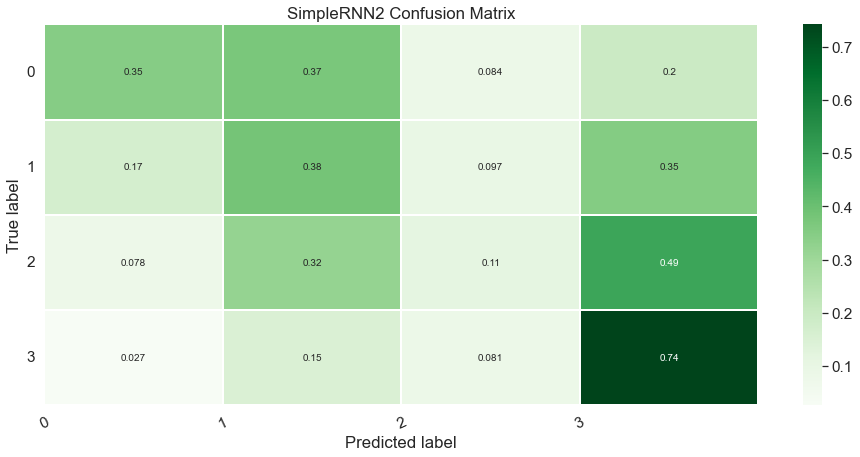

In [70]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SimpleRNN2 Confusion Matrix')
plt.show()

### RNN3

In [59]:
model_RNN3 = Sequential()                            
model_RNN3.add(SimpleRNN(16,
                    activation='linear'))
    
model_RNN3.add(Dense(16,
                    input_dim=X_train_lstm.shape[1],
                    activation='relu'))
model_RNN3.add(Dense(16,
                    activation='relu'))
    
model_RNN3.add(Dense(4,
                    activation='softmax'))

opt = tf.keras.optimizers.Adamax(learning_rate = 0.01, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model_RNN3.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_RNN3.fit(X_train_lstm, y_train, epochs = 20, batch_size=32)

Epoch 1/20
546/546 [==============================] - 3s 2ms/step - loss: 1.2249 - accuracy: 0.4416
Epoch 2/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1873 - accuracy: 0.4634
Epoch 3/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1813 - accuracy: 0.4688
Epoch 4/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1775 - accuracy: 0.4680
Epoch 5/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1749 - accuracy: 0.4710
Epoch 6/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1703 - accuracy: 0.4718
Epoch 7/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1692 - accuracy: 0.4727
Epoch 8/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1709 - accuracy: 0.4687
Epoch 9/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1674 - accuracy: 0.4737
Epoch 10/20
546/546 [==============================] - 1s 3ms/step - loss: 1.1651 - accuracy: 0.4739

In [60]:
val_loss, val_acc = model_RNN3.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1776 - accuracy: 0.4668


In [61]:
y_pred = model_RNN3.predict(X_test_lstm)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.46      0.27      0.35       572
           1       0.33      0.38      0.35      1007
           2       0.31      0.08      0.13      1029
           3       0.54      0.81      0.65      1756

    accuracy                           0.47      4364
   macro avg       0.41      0.39      0.37      4364
weighted avg       0.43      0.47      0.42      4364



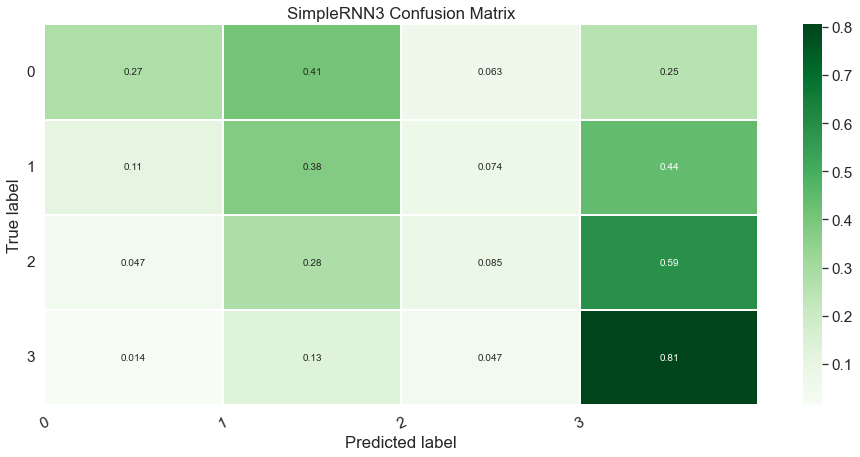

In [63]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SimpleRNN3 Confusion Matrix')
plt.show()

## LSTM Hyperparams

In [41]:
def OSA_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(LSTM(params['first_neuron'],
                    activation=params['first_activation']))
    
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation=params['second_activation']))
    
    model.add(Dense(y_train.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=1,
                    validation_data=[x_val, y_val])
    
    return out, model

In [42]:
p = {'lr': [0.001, 0.01, 0.1],
     'first_neuron':[4, 8, 16, 32, 64, 128],
     'batch_size': [5, 10, 20, 32],
     'epochs': [3],
     'optimizer': [Adam, Nadam],
     'loss': ['categorical_crossentropy'],
     'first_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
     'second_activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
     'last_activation': ['softmax']}

In [43]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=OSA_model,
                         experiment_name='OSA_hyper_lstm',
                         fraction_limit=.001)

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

Epoch 1/3
478/478 [==============================] - 6s 5ms/step - loss: 1.3697 - acc: 0.4026 - val_loss: 1.3602 - val_acc: 0.4004
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3528 - acc: 0.4032 - val_loss: 1.3456 - val_acc: 0.4004
Epoch 3/3
478/478 [==============================] - 2s 3ms/step - loss: 1.3402 - acc: 0.4032 - val_loss: 1.3349 - val_acc: 0.4004


 11%|█████████▎                                                                          | 1/9 [00:09<01:17,  9.72s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 4ms/step - loss: 1.2435 - acc: 0.4290 - val_loss: 1.2128 - val_acc: 0.4487
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.1982 - acc: 0.4584 - val_loss: 1.1990 - val_acc: 0.4534
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.1845 - acc: 0.4641 - val_loss: 1.1867 - val_acc: 0.4566


 22%|██████████████████▋                                                                 | 2/9 [00:45<02:55, 25.06s/it]

Epoch 1/3
3055/3055 [==============================] - 14s 4ms/step - loss: 1.3144 - acc: 0.4032 - val_loss: 1.3061 - val_acc: 0.4004
Epoch 2/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3006 - acc: 0.4032 - val_loss: 1.2984 - val_acc: 0.4004
Epoch 3/3
3055/3055 [==============================] - 12s 4ms/step - loss: 1.2916 - acc: 0.4032 - val_loss: 1.2885 - val_acc: 0.4004


 33%|████████████████████████████                                                        | 3/9 [01:22<03:02, 30.50s/it]

Epoch 1/3
3055/3055 [==============================] - 18s 4ms/step - loss: 1.3634 - acc: 0.3954 - val_loss: 1.3576 - val_acc: 0.4001
Epoch 2/3
3055/3055 [==============================] - 11s 3ms/step - loss: 1.3512 - acc: 0.4021 - val_loss: 1.3453 - val_acc: 0.4002
Epoch 3/3
3055/3055 [==============================] - 11s 4ms/step - loss: 1.3389 - acc: 0.4030 - val_loss: 1.3333 - val_acc: 0.4004


 44%|█████████████████████████████████████▎                                              | 4/9 [02:01<02:50, 34.04s/it]

Epoch 1/3
1528/1528 [==============================] - 8s 4ms/step - loss: 1.3690 - acc: 0.3995 - val_loss: 1.3526 - val_acc: 0.4004
Epoch 2/3
1528/1528 [==============================] - 7s 5ms/step - loss: 1.3388 - acc: 0.4032 - val_loss: 1.3287 - val_acc: 0.4004
Epoch 3/3
1528/1528 [==============================] - 6s 4ms/step - loss: 1.3214 - acc: 0.4032 - val_loss: 1.3176 - val_acc: 0.4004


 56%|██████████████████████████████████████████████▋                                     | 5/9 [02:23<01:58, 29.67s/it]

Epoch 1/3
478/478 [==============================] - 5s 4ms/step - loss: 1.3977 - acc: 0.1316 - val_loss: 1.3963 - val_acc: 0.1311
Epoch 2/3
478/478 [==============================] - 2s 3ms/step - loss: 1.3968 - acc: 0.1319 - val_loss: 1.3955 - val_acc: 0.1314
Epoch 3/3
478/478 [==============================] - 2s 3ms/step - loss: 1.3959 - acc: 0.1325 - val_loss: 1.3946 - val_acc: 0.1317


 67%|████████████████████████████████████████████████████████                            | 6/9 [02:32<01:07, 22.49s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 3ms/step - loss: 1.3217 - acc: 0.4032 - val_loss: 1.3141 - val_acc: 0.4004
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.3085 - acc: 0.4032 - val_loss: 1.3064 - val_acc: 0.4004
Epoch 3/3
3055/3055 [==============================] - 9s 3ms/step - loss: 1.3027 - acc: 0.4032 - val_loss: 1.3014 - val_acc: 0.4004


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [03:05<00:51, 25.80s/it]

Epoch 1/3
3055/3055 [==============================] - 13s 3ms/step - loss: 1.3030 - acc: 0.4051 - val_loss: 1.2685 - val_acc: 0.4128
Epoch 2/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2461 - acc: 0.4423 - val_loss: 1.2392 - val_acc: 0.4429
Epoch 3/3
3055/3055 [==============================] - 10s 3ms/step - loss: 1.2287 - acc: 0.4506 - val_loss: 1.2277 - val_acc: 0.4471


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [03:39<00:28, 28.41s/it]

Epoch 1/3
478/478 [==============================] - 5s 4ms/step - loss: 1.3610 - acc: 0.4032 - val_loss: 1.3357 - val_acc: 0.4004
Epoch 2/3
478/478 [==============================] - 2s 4ms/step - loss: 1.3230 - acc: 0.4032 - val_loss: 1.3170 - val_acc: 0.4004
Epoch 3/3
478/478 [==============================] - 2s 3ms/step - loss: 1.3123 - acc: 0.4032 - val_loss: 1.3111 - val_acc: 0.4004


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [03:47<00:00, 25.28s/it]


In [44]:
analyze_object = talos.Analyze(scan_object)

In [45]:
analyze_object.data

,start,end,duration,round_epochs,loss,acc,val_loss,val_acc,lr,first_neuron,batch_size,epochs,optimizer,loss,first_activation,second_activation,last_activation
0,07/21/22-054038,07/21/22-054047,9.459133,3,1.340229,0.403156,1.334860,0.400397,0.010,8,32,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,hard_sigmoid,softplus,softmax
1,07/21/22-054047,07/21/22-054123,35.492751,3,1.184548,0.464117,1.186723,0.456615,0.100,128,5,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,relu,linear,softmax
2,07/21/22-054123,07/21/22-054200,36.703696,3,1.291554,0.403156,1.288451,0.400397,0.010,128,5,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softplus,softsign,softmax
3,07/21/22-054200,07/21/22-054239,39.149079,3,1.338913,0.403025,1.333286,0.400397,0.001,64,5,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,tanh,relu,softmax
4,07/21/22-054240,07/21/22-054301,21.579074,3,1.321379,0.403156,1.317627,0.400397,0.010,128,10,3,<class 'keras.optimizers.optimizer_v2.adam.Adam'>,categorical_crossentropy,softmax,tanh,softmax
5,07/21/22-054302,07/21/22-054310,8.266087,3,1.395933,0.132530,1.394615,0.131683,0.001,4,32,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,sigmoid,softsign,softmax
6,07/21/22-054310,07/21/22-054342,32.332081,3,1.302653,0.403156,1.301378,0.400397,0.010,8,5,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,softplus,softsign,softmax
7,07/21/22-054343,07/21/22-054416,33.712612,3,1.228727,0.450563,1.227717,0.447143,0.100,16,5,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,relu,softmax,softmax
8,07/21/22-054417,07/21/22-054425,8.229789,3,1.312292,0.403156,1.311134,0.400397,0.100,4,32,3,<class 'keras.optimizers.optimizer_v2.nadam.Na...,categorical_crossentropy,sigmoid,sigmoid,softmax


In [46]:
analyze_object.high('val_acc')

0.45661473274230957

In [47]:
analyze_object.rounds2high('val_acc')

1

In [48]:
n= analyze_object.rounds2high('val_acc')
analyze_object.data.loc[n]

start                                                  07/21/22-054047
end                                                    07/21/22-054123
duration                                                     35.492751
round_epochs                                                         3
loss                                                          1.184548
acc                                                           0.464117
val_loss                                                      1.186723
val_acc                                                       0.456615
lr                                                                 0.1
first_neuron                                                       128
batch_size                                                           5
epochs                                                               3
optimizer            <class 'keras.optimizers.optimizer_v2.adam.Adam'>
loss                                          categorical_crossentropy
first_

In [49]:
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'], n =1) 
# the 1st parameter is the metric youre interested in, the 2nd parameter is the metrics you want excluded, it runs 10 scans by defualt, but you can change this to n = #
# this returns the parameters for the run with highest val_acc (run 22)

array([['07/21/22-054047', 3, 'linear', 35.49275088310242, 0.1, 128, 5,
        '07/21/22-054123',
        <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 3, 'relu',
        'softmax', 0]], dtype=object)

In [50]:
analyze_object.correlate('val_acc', ['acc', 'loss', 'val_loss'])

duration        0.539453
round_epochs         NaN
lr              0.453373
first_neuron    0.352216
batch_size     -0.557279
epochs               NaN
Name: val_acc, dtype: float64

### Increasing the number of hidden layers for LSTM model

#### LSTM2 Model

In [51]:
model_lstm2 = Sequential()                            
model_lstm2.add(LSTM(16,
                    activation='linear'))
    
model_lstm2.add(Dense(16,
                    input_dim=X_train_lstm.shape[1],
                    activation='relu'))
model_lstm2.add(Dense(16,
                    activation='relu'))
    
model_lstm2.add(Dense(4,
                    activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model_lstm2.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_lstm2.fit(X_train_lstm, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
546/546 [==============================] - 3s 3ms/step - loss: 1.2494 - accuracy: 0.4287
Epoch 2/10
546/546 [==============================] - 1s 2ms/step - loss: 1.1944 - accuracy: 0.4578
Epoch 3/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1813 - accuracy: 0.4636
Epoch 4/10
546/546 [==============================] - 2s 3ms/step - loss: 1.1761 - accuracy: 0.4697
Epoch 5/10
546/546 [==============================] - 1s 3ms/step - loss: 1.1698 - accuracy: 0.4704
Epoch 6/10
546/546 [==============================] - 1s 2ms/step - loss: 1.1658 - accuracy: 0.4718
Epoch 7/10
546/546 [==============================] - 1s 2ms/step - loss: 1.1658 - accuracy: 0.4706
Epoch 8/10
546/546 [==============================] - 1s 2ms/step - loss: 1.1629 - accuracy: 0.4725
Epoch 9/10
546/546 [==============================] - 1s 2ms/step - loss: 1.1605 - accuracy: 0.4765
Epoch 10/10
546/546 [==============================] - 1s 3ms/step - loss: 1.1601 - accuracy: 0.4756

In [52]:
val_loss, val_acc = model_lstm2.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1769 - accuracy: 0.4677


In [53]:
y_pred = model_lstm2.predict(X_test_lstm)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.54      0.15      0.23       572
           1       0.34      0.44      0.38      1007
           2       0.33      0.02      0.04      1029
           3       0.53      0.85      0.65      1756

    accuracy                           0.47      4364
   macro avg       0.43      0.36      0.32      4364
weighted avg       0.44      0.47      0.39      4364



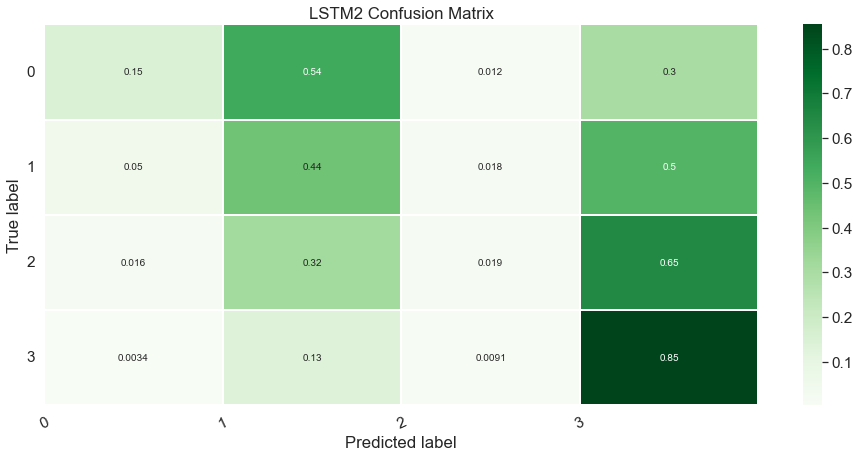

In [54]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('LSTM2 Confusion Matrix')
plt.show()

### LSTM3

In [55]:
model_lstm2 = Sequential()                            
model_lstm2.add(LSTM(16,
                    activation='tanh'))
    
model_lstm2.add(Dense(16,
                    input_dim=X_train_lstm.shape[1],
                    activation='relu'))
model_lstm2.add(Dense(16,
                    activation='relu'))
    
model_lstm2.add(Dense(4,
                    activation='softmax'))

opt = tf.keras.optimizers.Adamax(learning_rate = 0.01, decay = 1e-5)  # the optimizer settings can have a large impact. Decay, decreases the learning rate
model_lstm2.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_lstm2.fit(X_train_lstm, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
546/546 [==============================] - 5s 3ms/step - loss: 1.2224 - accuracy: 0.4433
Epoch 2/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1838 - accuracy: 0.4626
Epoch 3/20
546/546 [==============================] - 2s 4ms/step - loss: 1.1742 - accuracy: 0.4669
Epoch 4/20
546/546 [==============================] - 2s 4ms/step - loss: 1.1707 - accuracy: 0.4700
Epoch 5/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1659 - accuracy: 0.4735
Epoch 6/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1651 - accuracy: 0.4702
Epoch 7/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1589 - accuracy: 0.4761
Epoch 8/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1573 - accuracy: 0.4775
Epoch 9/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1554 - accuracy: 0.4765
Epoch 10/20
546/546 [==============================] - 2s 3ms/step - loss: 1.1527 - accuracy: 0.4779

In [56]:
val_loss, val_acc = model_lstm2.evaluate(X_test_lstm, y_test)

137/137 [==============================] - 1s 2ms/step - loss: 1.1907 - accuracy: 0.4533


In [57]:
y_pred = model_lstm2.predict(X_test_lstm)
y_pred_sev = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_sev))

137/137 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.46      0.25      0.32       572
           1       0.33      0.29      0.31      1007
           2       0.28      0.20      0.23      1029
           3       0.55      0.76      0.64      1756

    accuracy                           0.45      4364
   macro avg       0.40      0.38      0.38      4364
weighted avg       0.42      0.45      0.43      4364



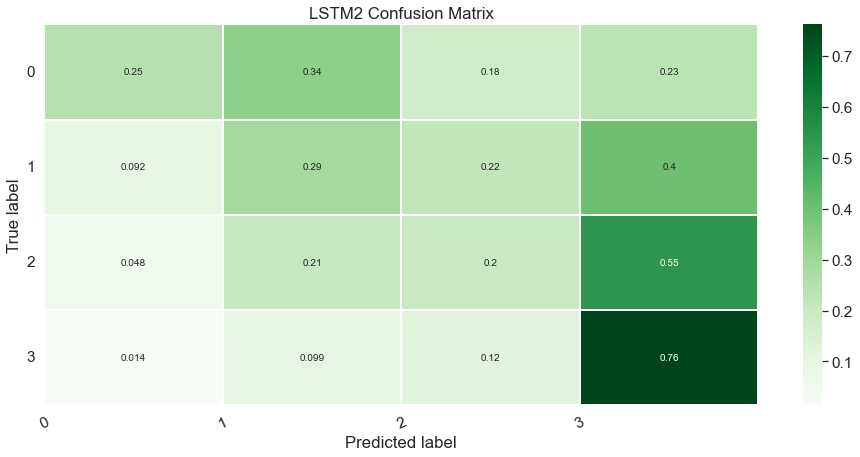

In [58]:
matrix = confusion_matrix(y_test, y_pred_sev)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1','2', '3']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('LSTM2 Confusion Matrix')
plt.show()